In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
fake_news = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
true_news = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
true_news['label'] = 1
fake_news['label'] = 0

data = pd.concat([true_news,fake_news])

data['text'] = data['title'] + data['text']
data['text'] = data['text'].astype('str') 
data = data.drop('title',axis=1)

data

,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",1
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,Middle-east,"January 14, 2016",0


In [5]:
from tensorflow.keras import layers

features = 20000
seq_len = 500

vectorization_layer = layers.TextVectorization(
    max_tokens=features,
    output_mode='int',
    output_sequence_length=seq_len,
    standardize='lower_and_strip_punctuation')
vectorization_layer.adapt(data['text'].values)


txt_input = tf.keras.Input(shape=(1,), dtype=tf.string)
x = vectorization_layer(txt_input)
x = layers.Embedding(features+1,128)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(txt_input, output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

2022-12-31 17:23:32.995924: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-31 17:23:33.627990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 500)               0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 128)          2560128   
_________________________________________________________________
conv1d (Conv1D)              (None, 165, 128)          114816    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 53, 128)           114816    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512 

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    x=data['text'].values,
    y=data['label'].values,
    epochs=5, 
    validation_split=0.2,
    shuffle=True, 
    callbacks=[callback])

Epoch 1/5
1123/1123 [==============================] - 105s 92ms/step - loss: 0.0656 - accuracy: 0.9697 - val_loss: 0.0345 - val_accuracy: 0.9901
Epoch 2/5
1123/1123 [==============================] - 103s 92ms/step - loss: 0.0075 - accuracy: 0.9982 - val_loss: 0.1061 - val_accuracy: 0.9683
Epoch 3/5
1123/1123 [==============================] - 104s 92ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.1553 - val_accuracy: 0.9668
Epoch 4/5
1123/1123 [==============================] - 104s 93ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0843 - val_accuracy: 0.9815


<AxesSubplot:>

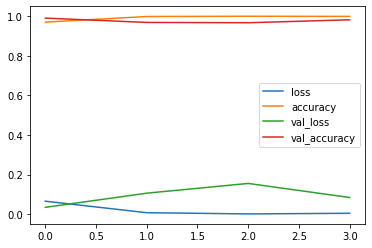

In [7]:
pd.DataFrame(history.history).plot()

# Sources
https://keras.io/examples/nlp/text_classification_from_scratch/